**1. Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.**

In [53]:
from math import sqrt, factorial
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [6]:
# среднее арифметическое
n = 0
sum = 0
for el in salary:
    sum += el
    n += 1
mean = sum/n
mean

65.3

In [8]:
# среднее квадратичное отклонение
x = 0
for el in salary:
    x += (el - mean)**2
msd = sqrt(x/n)
msd

30.823854398825596

In [9]:
# смещённая дисперсия
b_var = msd**2
b_var

950.11

In [11]:
# несмещённая дисперсия
unb_var = b_var*n/(n-1)
unb_var

1000.1157894736842

In [30]:
# первый квартиль
salary.sort()
first_q = int(n*0.25)
salary[first_q]

45

In [31]:
df = pd.DataFrame(salary)

In [32]:
df.quantile(0.25)

0    42.0
Name: 0.25, dtype: float64

*здесь возник вопрос: автоматическим методом квартиль получается равен 42. Но в выборке нет такого значения. Если мы рассматриваем дискретную случайную величину, может ли квартилем быть значение, которого нет в выборке?* 

In [33]:
# третий квартиль
third_q = int(n*0.75)
salary[third_q]

84

In [34]:
df.quantile(0.75)

0    81.0
Name: 0.75, dtype: float64

In [35]:
# интерквартильное расстояние
interq_dist = salary[third_q] - salary[first_q]
interq_dist

39

In [36]:
interq_dist_auto = df.quantile(0.75) - df.quantile(0.25)
interq_dist_auto

0    39.0
dtype: float64

In [45]:
type(df[0])

pandas.core.series.Series

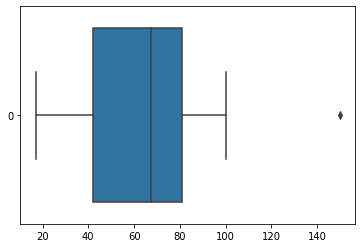

In [52]:
# выбросы
sns.boxplot(data = df[0], orient='h')
plt.show()

**2. В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?**

In [54]:
def comb(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

In [62]:
# 1ый случай - из 1го ящика 2 белых, из второго - 1
p11 = comb(5,2)/comb(8, 2) #вероятность из 1го вытащить 2 белых
p12 = comb(5,1)*comb(7,3)/comb(12, 4) #вероятность из 2го вытащить 1 белый и 3 черных
p1 = p1*p2
#2ой случай - из 1го ящика 1 белый, из второго - 2
p21 = comb(5,1)*comb(3,1)/comb(8,2) #вероятность из 1го вытащить 1 белый и 1 черный
p22 = comb(5,2)*comb(7,2)/comb(12,4) #вероятность из 2го вытащить 2 белых и 2 черных
p2 = p21*p22
#3ий случай - из 1го ящика 0 белых,из второго - 3
p31 = comb(5,0)*comb(3,2)/comb(8,2) #вероятность из 1го вытащить 0 белых и 2 черных
p32 = comb(5,3)*comb(7,1)/comb(12,4) #вероятность из 2го вытащить 3 белых и 1 черный
p3 = p31*p32

p = p1 + p2 + p3
p

0.24242424273355592

**3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?**

In [79]:
# воспользуемся формулой Байеса, чтобы определить вероятность события В (что это студент определённого факультета),
# при условии, что событие А уже произошло (сессия сдана)
pa = 0.8
pb = 0.7
pc = 0.9
p_B = 1/3
p_A = p_B*(pa + pb + pc)

student_a = pa*p_B/p_A
student_b = pb*p_B/p_A
student_c = pc*p_B/p_A
print(f'Вероятность того, что сессию сдал студент факультета А - {round(student_a, 3)}, \nфакультета В - {round(student_b,3)}, \nфакультета С - {round(student_c,3)}.')

Вероятность того, что сессию сдал студент факультета А - 0.333, 
факультета В - 0.292, 
факультета С - 0.375.


**4.Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?**

In [103]:
p_all = 0.1*0.2*0.25
p_two = 0.1*0.2 + 0.1*0.25 + 0.2*0.25    # 1 и 2 / 1 и 3 / 2 и 3
p_at_least_one = 1 - (1-0.1)*(1-0.2)*(1-0.25) # 1 минус вероятность, что ни одна деталь не сломается
p_one_two = 0.1 + 0.2 + 0.25 + p_two
print(f'Вероятность того, что из строя выйдут:\nвсе детали - {round(p_all, 3)},\n\
две детали - {p_two},\n\
хотя бы одна деталь - {round(p_at_least_one, 3)},\n\
от одной до двух деталей - {p_one_two}')

Вероятность того, что из строя выйдут:
все детали - 0.005,
две детали - 0.095,
хотя бы одна деталь - 0.46,
от одной до двух деталей - 0.645
